In [2]:
import pandas as pd
import numpy as np
import functions as fxn
from astropy.coordinates import SkyCoord
import astropy.units as u

In [7]:
new_obj = pd.read_csv('new_objects.csv')
new_obj = new_obj[new_obj['Strange'] == 1]
new_obj = new_obj.drop(columns = 'Strange')
new_obj = new_obj.reset_index(drop=True)
print(new_obj.head())
list(new_obj.columns)

     SHORTNAME           DISCOVERYNAME     DISCOVERYREFNAME          RA  \
0   J0112-7031                     ...                  ...   18.092393   
1  J0138+8110A  GDR2565989347158652288  ...................   24.787510   
2  J0338-00061                     ...  2008AJ....135..785W   54.683183   
3   J0419+2826                   WK811  From_Simbad........   64.859489   
4   J1049-5319               Luhman16A  2013ApJ...767L...1L  162.308430   

         DEC      POSITIONREFNAME  POSITIONEPOCH               PECULIARNAME  \
0 -70.522914                 GDR3         2016.0                        ...   
1  81.166582                 GDR3         2016.0                        ...   
2  -0.115057                 GDR3         2016.0  GalacticExtinction>0.2mag   
3  28.437181                 GDR3         2016.0                        ...   
4 -53.318057  2018A&A...616A...1G         2015.5                     Binary   

       PECULIARREFNAME MGCANDIDACYNAME  ...     EVTAN     DMOD       GAIAS

['SHORTNAME',
 'DISCOVERYNAME',
 'DISCOVERYREFNAME',
 'RA',
 'DEC',
 'POSITIONREFNAME',
 'POSITIONEPOCH',
 'PECULIARNAME',
 'PECULIARREFNAME',
 'MGCANDIDACYNAME',
 'MGCANDIDACYREFNAME',
 'MULTIPLEFLAGNAME',
 'MULTIPLEFLAGREFNAME',
 'COMMENTSNAME',
 'SPTOPTNAME',
 'COMPANIONS',
 'NUMCOMPANION',
 'SPTOPTREFNAME',
 'SPTNIRNAME',
 'SPTNIRREFNAME',
 'SPTPHONAME',
 'SPTPHOREFNAME',
 'SPTNUM',
 'PARALLAX',
 'PARALLAXERR',
 'PARALLAXREFNAME',
 'PMRA',
 'PMRAERR',
 'PMDEC',
 'PMDECERR',
 'PMREFNAME',
 'RV',
 'RVERR',
 'RVREFNAME',
 'TMASSJ',
 'TMASSJERR',
 'TMASSH',
 'TMASSHERR',
 'TMASSK',
 'TMASSKERR',
 'TMASSFLAGNAME',
 'WISEW1',
 'WISEW1ERR',
 'WISEW2',
 'WISEW2ERR',
 'WISEW3',
 'WISEW3ERR',
 'WISEFLAGNAME',
 'PS1G',
 'PS1GERR',
 'PS1R',
 'PS1RERR',
 'PS1I',
 'PS1IERR',
 'PS1Z',
 'PS1ZERR',
 'PS1Y',
 'PS1YERR',
 'PS1FLAGNAME',
 'PS1REFNAME',
 'SDSSG',
 'SDSSGERR',
 'SDSSR',
 'SDSSRERR',
 'SDSSI',
 'SDSSIERR',
 'SDSSZ',
 'SDSSZERR',
 'SDSSFLAGNAME',
 'SDSSREFNAME',
 'IRACCH1',
 'IRACCH1ERR',

In [8]:
secondary = pd.read_csv('Master_withDR3.csv')
secondary

,SHORTNAME,DISCOVERYNAME,DISCOVERYREFNAME,RA,DEC,POSITIONREFNAME,POSITIONEPOCH,PECULIARNAME,PECULIARREFNAME,MGCANDIDACYNAME,...,JGEN,VTAN,EVTAN,DMOD,GAIASEP,RA2016,DEC2016,LITPARALLAX,LITPARALLAXERR,LITPARALLAXREFNAME
0,J0000+1523,ULASJ000005.87+152354.4,2016A&A...589A..49S,0.024492,15.398469,2007MNRAS.379.1599L,2007.82,...,...................,...,...,16.9250,-99999.00000,-99999.000000,-99999.000000,-99999.000000,0.024492,15.398500,-99999.0,-99999.0,...................
1,J0000+1136,ULASJ000010.43+113602.2,2015MNRAS.450.2486C,0.043463,11.600600,2007MNRAS.379.1599L,2010.57,...,...................,...,...,18.6500,-99999.00000,-99999.000000,-99999.000000,-99999.000000,0.043463,11.600600,-99999.0,-99999.0,...................
2,J0000+2554,2MASS00001354+2554180,2004AJ....127.3553K,0.056354,25.905569,2006AJ....131.1163S,2016.00,...,...................,...:...,...,15.0630,8.57621,0.258957,-0.749834,-99999.000000,0.056335,25.905600,70.8,1.9,2012ApJS..201...19D
3,J0000+0051,...,2008AJ....135..785W,0.091531,0.858103,GDR3,2016.00,...,...................,...,...,16.3530,94.22760,18.882600,-7.517420,0.000263,0.091530,0.858103,-99999.0,-99999.0,...
4,J0000-1245,2MASSJ0000286-124515,2007AJ....133..439C,0.118741,-12.754698,GDR3,2016.00,...,...,...,...,13.2000,27.71730,0.382558,-2.595030,0.002047,0.118733,-12.754700,-99999.0,-99999.0,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14274,J2359-0151,2MASSJ23593281-0151526,2015ApJ...814..118B,359.886730,-1.864634,2003yCat.2246....0C,2000.81,...,...................,...,...,17.2410,-99999.00000,-99999.000000,-99999.000000,-99999.000000,359.887000,-1.865260,-99999.0,-99999.0,...................
14275,J2359+0504,ULASJ235935.80+050404.8,2016A&A...589A..49S,359.899190,5.068024,2007MNRAS.379.1599L,2009.65,...,...................,...,...,17.2248,-99999.00000,-99999.000000,-99999.000000,-99999.000000,359.899000,5.068020,-99999.0,-99999.0,...................
14276,J2359+0436,ULASJ235940.29+043659.9,2016A&A...589A..49S,359.917920,4.616630,2007MNRAS.379.1599L,2016.00,...,...................,...,...,16.3660,-99999.00000,-99999.000000,-99999.000000,-99999.000000,359.918000,4.616630,-99999.0,-99999.0,...................
14277,J2359-7335,WISEPAJ235941.07-733504.8,2011APJS..197...19K,359.921270,-73.584725,2014yCat.2328....0C,2010.56,...,...................,...:...,...,16.1600,15.50480,1.068950,-0.309905,-99999.000000,359.923000,-73.584700,86.7,5.7,2012ApJ...752...56F


In [9]:
p =[]
s= []
alpha = []
delta = []
separation = []


for i in range(len(new_obj)):
    c1 = SkyCoord(ra = new_obj.iloc[i]['RA']*u.deg, 
                dec = new_obj.iloc[i]['DEC']*u.deg, 
                distance = (100./new_obj.iloc[i]['PARALLAX'])*u.pc)
    sec = fxn.Converttolist(new_obj.iloc[i]['COMPANIONS'])
    print(sec)
    for j in range(len(secondary)):
        if secondary.iloc[j]['SHORTNAME'].strip() in sec :
            print('ok')
            c2 = SkyCoord(ra = secondary.iloc[j]['RA']*u.deg, 
                        dec = secondary.iloc[j]['DEC']*u.deg, 
                        distance = (100./secondary.iloc[j]['PARALLAX'])*u.pc)
            dist = c1.separation_3d(c2)
            separation.append(dist.au)
            print(dist)
            print(dist.au)
            p.append(new_obj.iloc[i]['SHORTNAME'])
            s.append(secondary.iloc[j]['SHORTNAME'])
            alpha.append(secondary.iloc[j]['RA'])
            delta.append(secondary.iloc[j]['DEC'])

['J0112-7031A']
ok
0.011246447300920115 pc
2319.7462734924675
['J0138+8110B']
ok
0.10590342357587663 pc
21844.149144782372
['J0338-0006']
ok
1.7371539308997432 pc
358313.71897841734
['J0419+2827']
ok
0.28114179548271884 pc
57989.65797320379
['J1049-5319B']
ok
8.942080298756931e-07 pc
0.1844436460269076
['J1132-3018']
ok
0.07432182841788491 pc
15329.977538544972
['J1141+3820']
ok
3.0575231881987066 pc
630659.4280098106
['J1231+4050B']
ok
0.046131864228234086 pc
9515.38003685406
['J1521+4336A']
ok
0.3012799925169819 pc
62143.45928264191
['J1536+3455']
ok
0.08015571625393986 pc
16533.303282716137
['J1628-24281']
ok
0.597955824865104 pc
123337.24236012336
['J1839+4424A']
ok
0.07825507382454579 pc
16141.267640272159


In [10]:
separation

[2319.7462734924675,
 21844.149144782372,
 358313.71897841734,
 57989.65797320379,
 0.1844436460269076,
 15329.977538544972,
 630659.4280098106,
 9515.38003685406,
 62143.45928264191,
 16533.303282716137,
 123337.24236012336,
 16141.267640272159]

In [11]:
sep = {'SHORTNAME': p, 'Obj_B': s,'RA_B':alpha, 'DEC_B':delta, 'separation':separation}
df_sep = pd.DataFrame(sep)
df_sep

,SHORTNAME,Obj_B,RA_B,DEC_B,separation
0,J0112-7031,J0112-7031A,18.093409,-70.522748,2319.746273
1,J0138+8110A,J0138+8110B,24.748626,81.168855,21844.149145
2,J0338-00061,J0338-0006,54.677822,-0.103599,358313.718978
3,J0419+2826,J0419+2827,64.897792,28.455964,57989.657973
4,J1049-5319,J1049-5319B,162.308640,-53.318278,0.184444
5,J1132-3019,J1132-3018,173.075450,-30.308899,15329.977539
6,J1141+3813,J1141+3820,175.379240,38.348453,630659.428010
7,J1231+4050C,J1231+4050B,188.079700,41.019802,9515.380037
8,J1521+4336,J1521+4336A,230.473300,43.597842,62143.459283
9,J1536+3455A,J1536+3455,234.231260,34.927338,16533.303283


In [14]:
new_list = pd.merge(df_sep, new_obj)
G= 6.6743e-11
M_sun = 1.988409870698051e+30

new_list = new_list[['SHORTNAME','DISCOVERYNAME','RA','DEC',
                    'COMPANIONS','RA_B', 'DEC_B', 'PARALLAX',
                    'PARALLAXERR','PARALLAXREFNAME','PMRA',
                    'PMRAERR','PMDEC','PMDECERR','GAIAG',
                    'GAIARP','TMASSK','TMASSJ','ABSmag','GAIA_GR','separation']]
new_list['binding energy'] = np.array(
                                list(map( lambda r: -G*(0.5*M_sun)**2/(r*1.496e+11), 
                                        new_list['separation'])))
new_list.to_csv("interesting_object_list.csv")

In [27]:
table = new_list[['SHORTNAME','PARALLAX','ABSmag','GAIA_GR','COMPANIONS',"separation", "binding energy"]]
row = []
row.append(list(table.columns))
for i in range(len(table)):
    row.append(list(table.iloc[i,:].values))
print(row)
from tabulate import tabulate
from texttable import Texttable
import latextable

tabulate = Texttable()
tabulate.set_cols_align(["c"]*len(table.columns))
tabulate.set_deco(Texttable.HEADER | Texttable.VLINES)
tabulate.add_rows(row)
print(latextable.draw_latex(tabulate, caption="Primary and secondary object with their basic properties\
    These objects shows strange behavior but satisfied with the algorithm used."))

[['SHORTNAME', 'PARALLAX', 'ABSmag', 'GAIA_GR', 'COMPANIONS', 'separation', 'binding energy'], ['J0112-7031', 20.7908, 14.863156003391602, 1.9358000000000004, 'J0112-7031A', 2319.7462734924675, -1.9010146940369503e+35], ['J0138+8110A', 24.3211, 15.3270160670509, 1.6088999999999984, 'J0138+8110B', 21844.149144782372, -2.0187885200371684e+34], ['J0338-00061', 7.2502, 13.7498499347159, 1.6050000000000004, 'J0338-0006', 358313.71897841734, -1.2307292517070111e+33], ['J0419+2826', 7.73423, 6.647385414742637, 1.0549999999999995, 'J0419+2827', 57989.65797320379, -7.604583138573396e+33], ['J1049-5319', 496.0, 20.409108382450988, 2.5251, 'J1049-5319B', 0.1844436460269076, -2.390904673237322e+39], ['J1132-3019', 21.0889, 11.85936963734396, 1.3871000000000002, 'J1132-3018', 15329.977538544972, -2.876632885637741e+34], ['J1141+3813', 8.1193, 12.75779294223925, 1.4619, 'J1141+3820', 630659.4280098106, -6.992477328473457e+32], ['J1231+4050C', 16.485, 9.353444757395858, 1.819399999999998, 'J1231+4050

In [1]:
G= 6.6743e-11
M_sun = 1.988409870698051e+30
df_sep['binding energy'] = np.array(
                                list(map( lambda r: -G*M_sun/(r*1.496e+11), 
                                        df_sep['separation'])))
df_sep['SHORTNAME']

NameError: name 'np' is not defined

In [70]:
import matplotlib.pyplot as plt

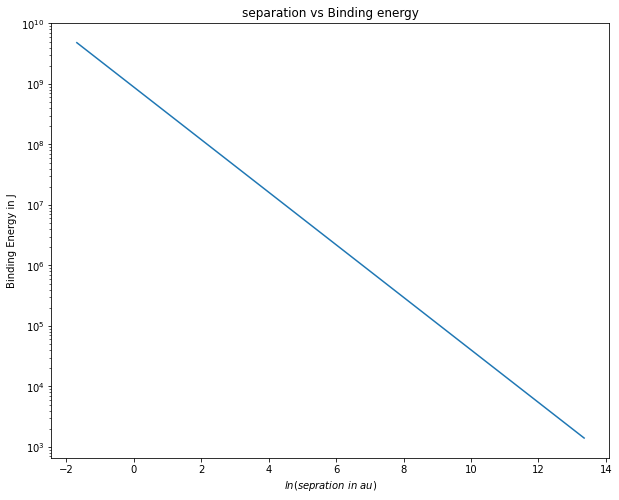

<Figure size 432x288 with 0 Axes>

In [103]:
plt.figure(figsize=(10,8))
plt.plot(np.log(df_sep['separation']), -df_sep['binding energy'])
plt.xlabel('$ln(sepration\ in\ au)$')
plt.ylabel('Binding Energy in J')
plt.title('separation vs Binding energy')
plt.yscale('log')
plt.show()
plt.savefig('Binding_sep_all.png')

Text(0.5, 1.0, 'separation vs Binding energy')

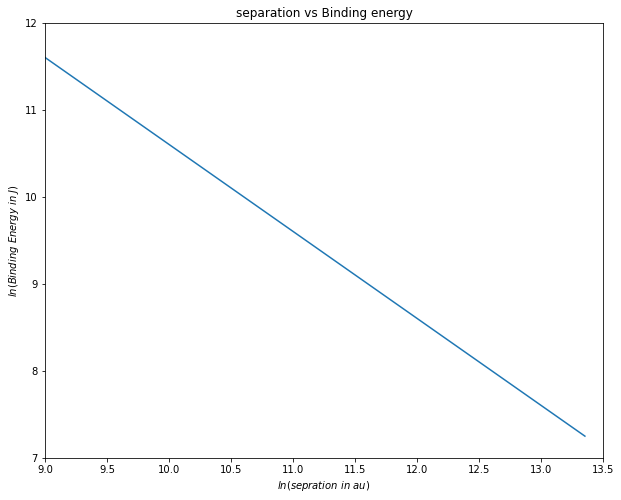

In [98]:
df_sep = df_sep.sort_values(by='separation')
plt.figure(figsize=(10,8))
plt.plot(np.log(df_sep['separation']), np.log(-df_sep['binding energy']))
plt.ylim(7,12)
plt.xlim(9,13.5)
plt.xlabel('$ln(sepration\ in\ au)$')
plt.ylabel('$ln(Binding\ Energy\ in\ J)$')
plt.title('separation vs Binding energy')

In [6]:
t = pd.read_csv('strange.csv' )
t

,Unnamed: 0,SHORTNAME,DISCOVERYNAME,RA,DEC,COMPANIONS,NUMCOMPANION,PARALLAX,PARALLAXERR,PARALLAXREFNAME,PMRA,PMRAERR,PMDEC,PMDECERR,GAIAG,GAIARP,TMASSK,TMASSJ,ABSmag,GAIA_GR
0,7,J0112-7031,...,18.092393,-70.522914,J0112-7031A,1,20.79080,0.146571,GDR3,170.65900,0.160285,70.684600,0.156772,18.2738,16.3380,12.391,13.453,14.863156,1.9358
1,8,J0138+8110A,GDR2565989347158652288,24.787510,81.166582,J0138+8110B,1,24.32110,0.158535,GDR3,-5.01684,0.218442,-26.424800,0.181943,18.3971,16.7882,12.829,13.891,15.327016,1.6089
2,14,J0338-00061,...,54.683183,-0.115057,J0338-0006,1,7.25020,0.351819,GDR3,38.54300,0.298869,-7.722120,0.273908,19.4481,17.8431,14.503,15.492,13.749850,1.6050
3,27,J0419+2826,WK811,64.859489,28.437181,J0419+2827,1,7.73423,0.025427,GDR3,8.05188,0.029261,-25.493300,0.017392,12.2053,11.1503,8.424,9.502,6.647385,1.0550
4,61,J1049-5319,Luhman16A,162.308430,-53.318057,J1049-5319B,1,496.00000,37.000000,2013ApJ...767L...1L,-2759.39000,5.959150,353.975000,2.512990,16.9317,14.4066,8.841,10.733,20.409108,2.5251
5,73,J1132-3019,TWA30,173.075840,-30.331184,J1132-3018,1,21.08890,0.044076,GDR3,-89.12680,0.047432,-25.221200,0.032732,15.2391,13.8520,8.765,9.641,11.859370,1.3871
6,74,J1141+3813,...,175.343950,38.218050,J1141+3820,1,8.11930,0.219548,GDR3,-28.82280,0.183604,-33.871600,0.147092,18.2102,16.7483,13.615,14.552,12.757793,1.4619
7,81,J1231+4050C,GDR21533994917485872512,188.056980,41.045884,J1231+4050B,1,16.48500,0.075776,GDR3,-130.15100,0.063339,35.930600,0.083709,13.2680,11.4486,9.148,9.997,9.353445,1.8194
8,107,J1521+4336,...,230.478090,43.608819,J1521+4336A,1,10.30680,0.140112,GDR3,-52.73920,0.137814,-0.985407,0.176183,18.4302,16.9223,13.539,14.479,13.495819,1.5079
9,109,J1536+3455A,GDR21374253611891873408,234.227350,34.929176,J1536+3455,1,15.85640,0.072785,GDR3,-93.11260,0.060700,220.320000,0.085674,16.1554,14.7464,11.697,12.609,12.156423,1.4090
